In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data() # Loading data 

11501568/11490434 [==============================] - 0s 0us/step


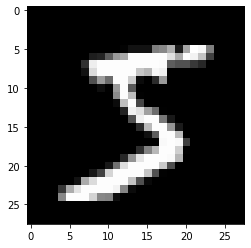

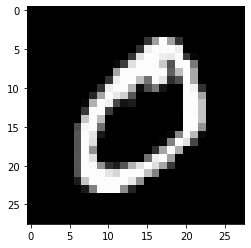

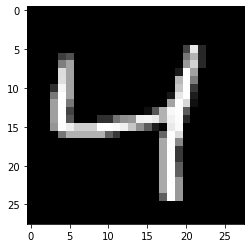

In [3]:
n_images = 3
for i in range(n_images):
    plt.imshow(np.reshape(x_train[i], [28, 28]), cmap='gray')
    plt.show() # Displaing few instances of the dataset

In [4]:
n_c = 10 # Number of classes: 0-9 digits
n_f = 784 # Number of features: 28*28

learning_rate = 0.001 # Setting learning rate
batch_size = 128 # Declaring batch size

n_h1 = 300 # Number of neurons in first hidden layer
n_h2 = 100 # Number of neurons in second hidden layer

In [5]:
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32) # Converting to float32

x_train, x_test = x_train.reshape([-1, n_f]), x_test.reshape([-1, n_f]) # reshaping data into 1-D vector of 784 features

x_train, x_test = x_train / 255., x_test / 255. # Normalising values to 0-1

In [6]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [7]:
# Initialising weights with random values
random_normal = tf.initializers.RandomNormal()
weights = {
'W1': tf.Variable(random_normal([n_f, n_h1])),
'W2': tf.Variable(random_normal([n_h1, n_h2])),
'W3': tf.Variable(random_normal([n_h2, n_c]))
}

# Initialising biases as zero
biases = {
'b1': tf.Variable(tf.zeros([n_h1])),
'b2': tf.Variable(tf.zeros([n_h2])),
'b3': tf.Variable(tf.zeros([n_c]))
}


In [8]:
def model(X):

    W1 = weights['W1']
    b1 = biases['b1']
    W2 = weights['W2']
    b2 = biases['b2']
    W3 = weights['W3']
    b3 = biases['b3']

    # Forward propogation 
    Z1 = tf.add(tf.matmul(X, W1),b1) 
    A1 = tf.nn.relu(Z1)                    
    Z2 = tf.add(tf.matmul(A1, W2),b2)                    
    A2 = tf.nn.relu(Z2)                                              
    Z3 = tf.matmul(A2, W3) + b3

    return tf.nn.softmax(Z3)

In [9]:
# Computing cross-entropy loss
def cross_entropy(y_pred, y_true):
    y_true = tf.one_hot(y_true, depth=n_c)
    y_pred = tf.clip_by_value(y_pred, 1e-15, 1.0)
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

# Computing Accuracy 
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

# Stochastic Gradient Descent optimiser
optimizer = tf.optimizers.SGD(learning_rate)

In [10]:
def Optimization(x, y):
    with tf.GradientTape() as tape:
        pred = model(x)
        loss = cross_entropy(pred, y)

    variables = list(weights.values()) + list(biases.values())
    gradients = tape.gradient(loss, variables) # Computing gradients
    optimizer.apply_gradients(zip(gradients, variables))

In [11]:
for step, (batch_x, batch_y) in enumerate(train_data.take(1600), 1):

    Optimization(batch_x, batch_y)
    
    if step % 200 == 0:
        pred = model(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

step: 200, loss: 35.877869, accuracy: 0.890625
step: 400, loss: 22.180206, accuracy: 0.953125
step: 600, loss: 19.153175, accuracy: 0.953125
step: 800, loss: 15.971523, accuracy: 0.984375
step: 1000, loss: 10.716794, accuracy: 0.976562
step: 1200, loss: 26.832495, accuracy: 0.953125
step: 1400, loss: 8.988423, accuracy: 0.992188
step: 1600, loss: 9.097746, accuracy: 0.976562


In [12]:
pred = model(x_test)
print("Test Accuracy: %f" % accuracy(pred, y_test)) # Finding and printing testing accuracy

Test Accuracy: 0.962900


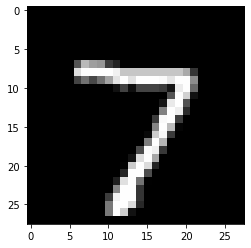

Model prediction: 7


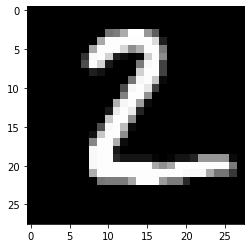

Model prediction: 2


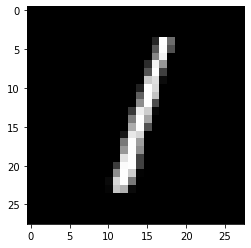

Model prediction: 1


In [13]:
n_images = 3
test_images = x_test[:n_images]
predictions = model(test_images)

# Display image and model prediction.
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))